### These figures is an example from astroML: see http://astroML.github.com (Author: Jake VanderPlas <vanderplas@astro.washington.edu>) adopted to Altair

## SDSS "Great Wall"

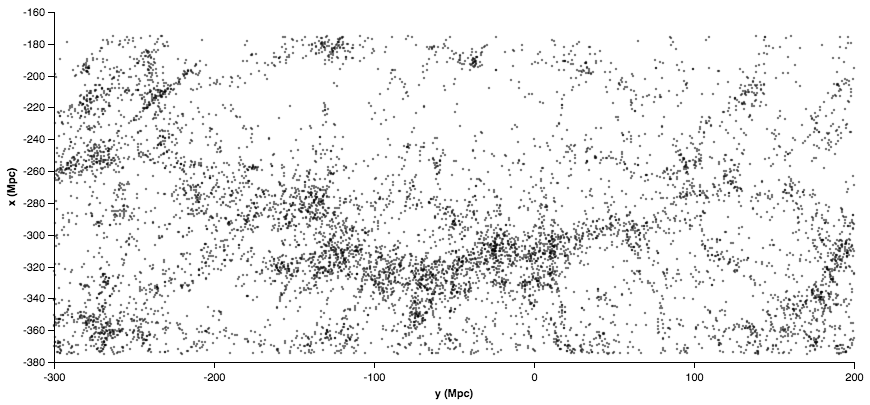

In [1]:
import pandas
from altair import *

from matplotlib import pyplot as plt

from astroML.datasets import fetch_great_wall

#------------------------------------------------------------
# Fetch the great wall data
gw = fetch_great_wall()
#------------------------------------------------------------
data = pandas.DataFrame()
data['y (Mpc)'] = gw[:, 1]
data['x (Mpc)'] = gw[:, 0]


Chart(data, max_rows = 100000).mark_circle(size=5, color = 'black', opacity=0.5).encode(
    y=Y('x (Mpc)', scale = Scale(domain=(-365, -175 ))),
    x=X('y (Mpc)')
).configure_cell(
    width=800,
    height=350
).configure_axis(
    grid=False,
    axisWidth=1,
    tickWidth=1,
    labels=True,        
)

## RR-Lyrae Magnitudes

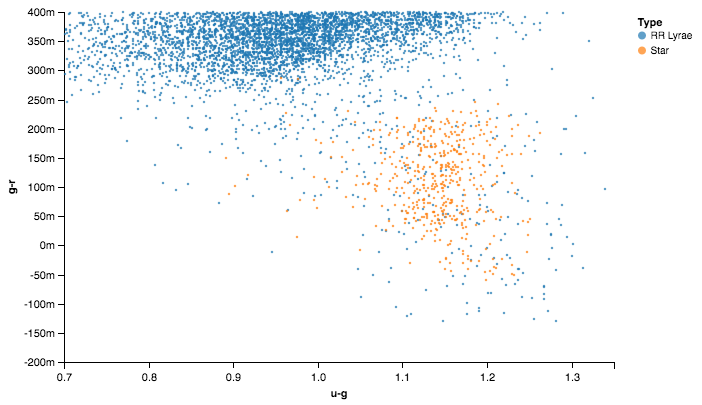

In [3]:
import pandas
import numpy
from matplotlib import pyplot as plt

from astroML.datasets import fetch_rrlyrae_combined

#----------------------------------------------------------------------
# get data and split into training & testing sets
rr_comb, is_rr = fetch_rrlyrae_combined()

rr_comb = rr_comb[-5000:]
is_rr = is_rr[-5000:]

stars = (is_rr == 0)
rrlyrae = (is_rr == 1)
#------------------------------------------------------------
data = pandas.DataFrame()
data['u-g'] = rr_comb[:, 0]
data['g-r'] = rr_comb[:, 1]
data['Type'] = 'RR Lyrae'
data.set_value(col='Type', index=numpy.where(is_rr)[0], value= 'Star')
from altair import *


Chart(data, max_rows = 100000).mark_circle(size=5, opacity=0.7).encode(
    x=X('u-g', scale = Scale(domain=(0.71, 1.35 ))),
    y=Y('g-r'),
    color='Type:N',
).configure_cell(
    width=550,
    height=350
).configure_axis(
    grid=False,
    axisWidth=1,
    tickWidth=1,
    labels=True,        
)